In [13]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [14]:
SUBJECT = "T009"
group = "control"
if SUBJECT.startswith("T"):
    group = "test"

montage = mne.channels.make_standard_montage("standard_1020")

In [15]:
# load raw EEG data
raw_eeg_file = (
    f"/mnt/d/work/ped_neuro_eeg_data/bids/sub-{SUBJECT}/eeg/sub-{SUBJECT}_task-rest_eeg.vhdr"
)
raw = mne.io.read_raw_brainvision(raw_eeg_file, preload=True)
raw.pick(picks="eeg")

raw.set_montage(montage, match_case=False, on_missing="ignore")

Extracting parameters from /mnt/d/work/ped_neuro_eeg_data/bids/sub-T009/eeg/sub-T009_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 301098  =      0.000 ...  1204.392 secs...


<RawBrainVision | sub-T009_task-rest_eeg.eeg, 27 x 301099 (1204.4 s), ~62.1 MiB, data loaded>

In [16]:
# load cleaned EEG data
cleaned_eeg_file = (
    f"/mnt/d/work/ped_neuro_eeg_data/bids/sub-{SUBJECT}/eeg/sub-{SUBJECT}_task-rest_cleaned_eeg.fif"
)
cleaned = mne.io.read_raw_fif(cleaned_eeg_file, preload=True)
cleaned.set_montage(montage, match_case=False, on_missing="ignore")

Opening raw data file /mnt/d/work/ped_neuro_eeg_data/bids/sub-T009/eeg/sub-T009_task-rest_cleaned_eeg.fif...
    Range : 138049 ... 300549 =    552.196 ...  1202.196 secs
Ready.
Reading 0 ... 162500  =      0.000 ...   650.000 secs...


<Raw | sub-T009_task-rest_cleaned_eeg.fif, 19 x 162501 (650.0 s), ~23.6 MiB, data loaded>

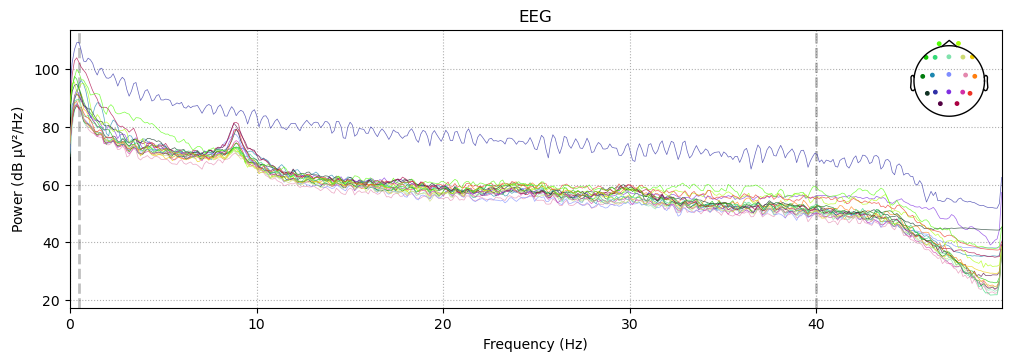

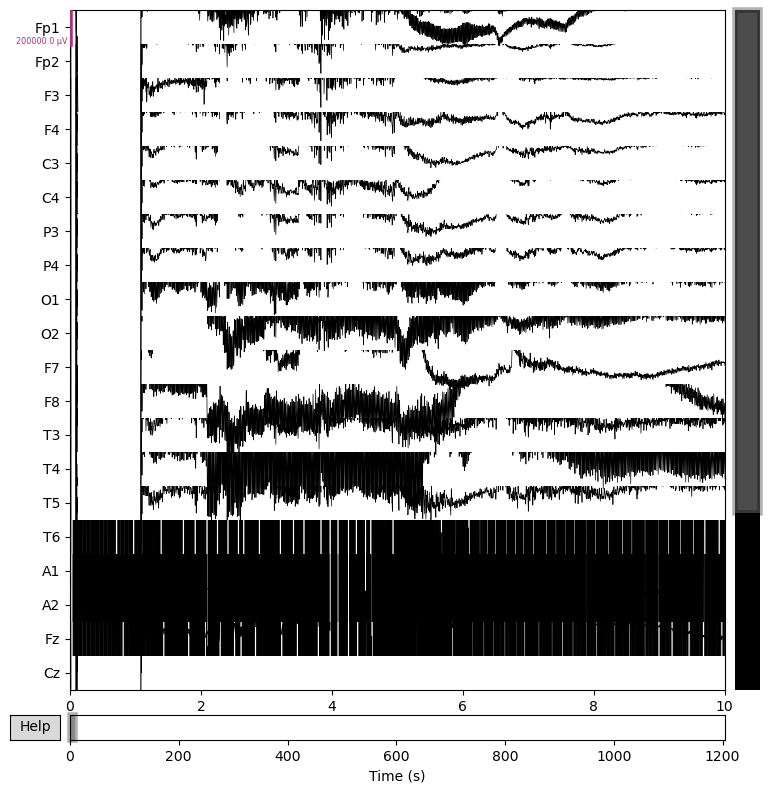

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/jure/miniconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


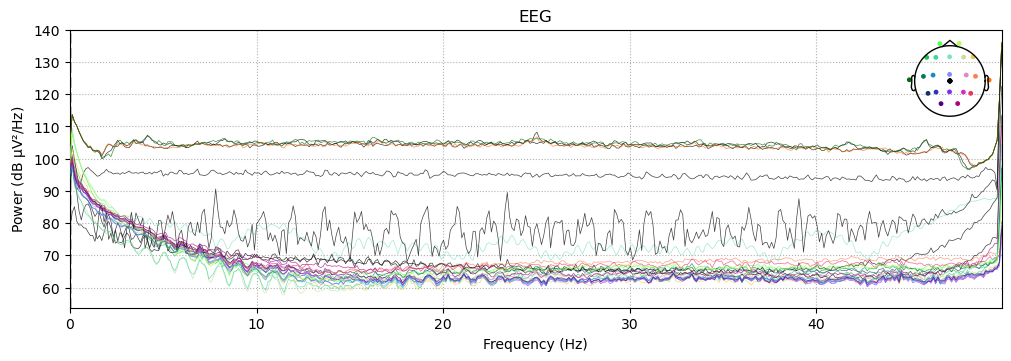

In [17]:
# raw data plots
raw.plot(scalings={"eeg": 10e-2})
raw.compute_psd(fmax=50).plot()

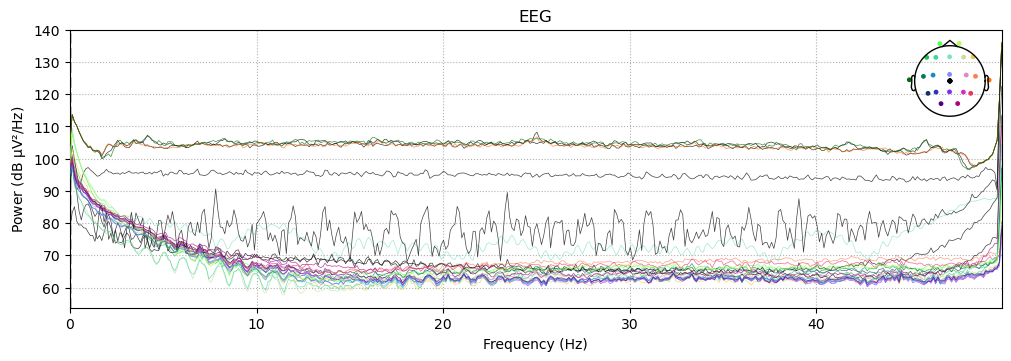

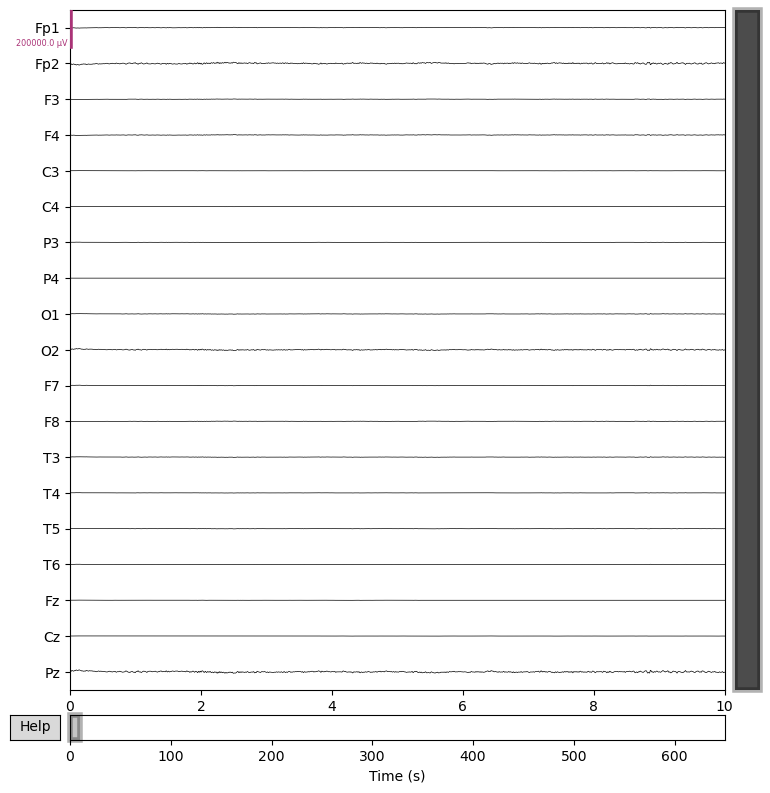

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/jure/miniconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


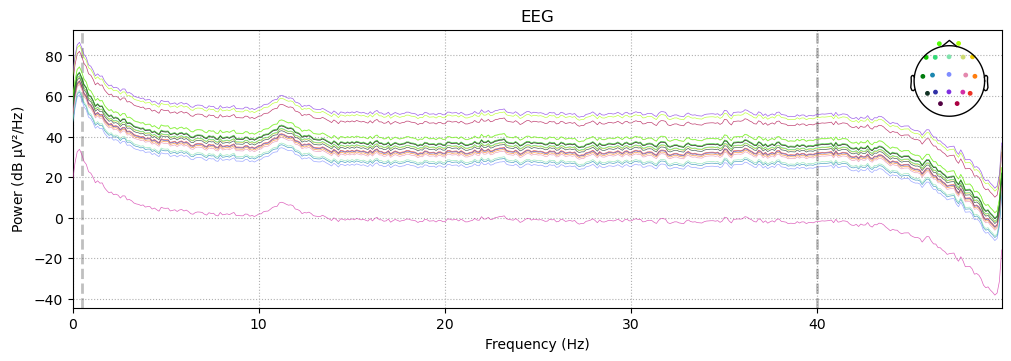

In [18]:
# cleaned data plots
cleaned.plot(scalings={"eeg": 10e-2})
cleaned.compute_psd(fmax=50).plot()